In [ ]:
'''
可视化训练集的数据分布

热力图：用来表现label的分布。纵坐标是label的标签，横坐标是client的编号
条形图：用来表现样本的分布。纵坐标是样本数，横坐标是client的编号
'''

In [1]:
%matplotlib inline
from IPython import display
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist

# sns.set_theme(style="whitegrid")
# sns.set_style('darkgrid')

2023-01-22 21:18:16.917552: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-22 21:18:17.488343: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-22 21:18:17.499002: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-22 21:18:17.499033: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
dirName = os.path.abspath ('').replace('\\', '/')  # 在jupyter里不可以直接使用__file__
dirName

'/home/ubuntu/Edge-TB/controller/dml_tool'

In [3]:
(_, train_labels), _ = fashion_mnist.load_data ()
print(len(train_labels))

60000


In [4]:
node = ['n' + str(i) for i in range(2, 16)] + ['p1'] # 注意灵活调整
images = {}
labels = {}
sample_size = {}
dataset_path = os.path.join(dirName, '../dataset/')
label_num = {}
tot = 0

In [ ]:
# 提供两种获取数据的方式，以供交叉验证

# 方式一：读取npy文件
for node_name in node:
    node_data_path = os.path.join(dataset_path, node_name + '_labels.npy')
    labels[node_name] = np.load(node_data_path)
    sample_size[node_name] = len(labels[node_name])
    label_num[node_name] = [np.sum(labels[node_name] == i) for i in range(0, 10)]
    tot += sum(label_num[node_name])

print(sample_size)
print(label_num)
print(tot)


In [5]:
# 方式二：读取conf文件
for node_name in node:
    conf = {}
    node_data_path = os.path.join(dirName, '../dml_file/conf', node_name + '_dataset.conf')
    with open(node_data_path, 'r') as f:
        conf.update (json.loads (f.read()))
    idxs = conf["train_idxs"]
    labels[node_name] = train_labels[idxs]
    sample_size[node_name] = len(idxs)
    assert sample_size[node_name] == conf["train_len"]
    label_num[node_name] = [np.sum(labels[node_name] == i) for i in range(0, 10)]
    tot += sum(label_num[node_name])

print(sample_size)
print(label_num)
print(tot)


{'n2': 4000, 'n3': 4000, 'n4': 4000, 'n5': 4000, 'n6': 4000, 'n7': 4000, 'n8': 4000, 'n9': 4000, 'n10': 4000, 'n11': 4000, 'n12': 4000, 'n13': 4000, 'n14': 4000, 'n15': 4000, 'p1': 4000}
{'n2': [373, 440, 404, 409, 395, 391, 400, 413, 380, 395], 'n3': [374, 420, 405, 398, 368, 404, 407, 405, 412, 407], 'n4': [375, 360, 392, 405, 418, 409, 437, 374, 403, 427], 'n5': [424, 415, 378, 400, 390, 387, 402, 402, 393, 409], 'n6': [389, 390, 403, 399, 396, 419, 422, 409, 383, 390], 'n7': [413, 396, 410, 421, 398, 405, 404, 423, 365, 365], 'n8': [417, 405, 378, 371, 415, 403, 391, 403, 432, 385], 'n9': [387, 385, 401, 439, 378, 412, 414, 409, 404, 371], 'n10': [415, 392, 388, 395, 400, 389, 378, 369, 426, 448], 'n11': [414, 393, 376, 385, 399, 398, 411, 435, 402, 387], 'n12': [413, 400, 396, 382, 446, 382, 389, 369, 415, 408], 'n13': [370, 398, 437, 392, 382, 407, 396, 409, 405, 404], 'n14': [413, 415, 439, 399, 373, 403, 365, 423, 393, 377], 'n15': [421, 397, 408, 399, 422, 372, 396, 394, 370, 

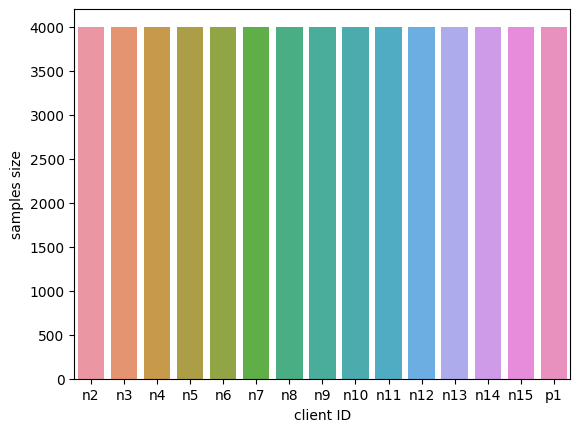

In [6]:
tmp = pd.DataFrame(data={'client ID':list(sample_size.keys()), 'samples size':list(sample_size.values())})
sns.barplot(x='client ID', y='samples size', data=tmp)
plt.show()

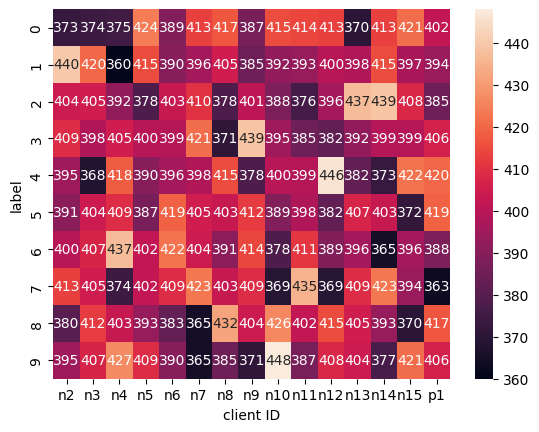

In [7]:
tmp = pd.DataFrame(label_num)
ax_2 = sns.heatmap(data = tmp, annot = True, fmt='g') # fmt='g'让它显示完整的数字，不然三位数以上会表示成科学计数法
ax_2.set_xlabel('client ID')
ax_2.set_ylabel('label')
plt.show()

In [ ]:
(origin_images, _), (_, _) = fashion_mnist.load_data ()
plt.imshow(origin_images[7])